# Solubility prediction using Morgan Fingerprints:

# Import Libraries and Data

In [20]:
import pandas as pd
#pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import re
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import DataStructs
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
from math import sqrt

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('data/final_rcpi_dataset_noZV.txt', delimiter = "\t")

# remove unwanted column
df.head()

,smiles.solute,logS_aq_avg,ALogP,ALogp2,AMR,naAromAtom,nAromBond,nAtom,ATSm1,ATSm2,ATSm3,ATSm4,ATSm5,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,C1SP1,C2SP1,C1SP2,C2SP2,C3SP2,C1SP3,C2SP3,C3SP3,C4SP3,ECCEN,FMF,fragC,nHBAcc,nHBDon,HybRatio,Kier1,Kier2,Kier3,khs.sssB,khs.sCH3,khs.dCH2,khs.ssCH2,khs.tCH,khs.dsCH,khs.aaCH,khs.sssCH,khs.ddC,khs.tsC,khs.dssC,khs.aasC,khs.aaaC,khs.ssssC,khs.sNH2,khs.dNH,khs.ssNH,khs.aaNH,khs.tN,khs.dsN,khs.aaN,khs.sssN,khs.ddsN,khs.aasN,khs.sOH,khs.dO,khs.ssO,khs.aaO,khs.sF,khs.sssP,khs.dsssP,khs.sSH,khs.dS,khs.ssS,khs.aaS,khs.dssS,khs.ddssS,khs.sCl,khs.sBr,khs.sI,nAtomLC,nAtomP,nAtomLAC,MDEC.11,MDEC.12,MDEC.13,MDEC.14,MDEC.22,MDEC.23,MDEC.24,MDEC.33,MDEC.34,MDEC.44,MDEO.11,MDEO.12,MDEO.22,MDEN.11,MDEN.12,MDEN.13,MDEN.22,MDEN.23,MDEN.33,MLogP,PetitjeanNumber,topoShape,nRotB,LipinskiFailures,TopoPSA,VAdjMat,MW,WTPT.1,WTPT.2,WTPT.3,WTPT.4,WTPT.5,WPATH,WPOL,XLogP,Zagreb
0,CC(C)\C=C\CC(O)=O,-1.15,1.6128,2.601124,36.7388,0,0,21,10.548938,8.664184,10.438653,6.664184,5.664184,346.449760,335.495801,339.281645,237.122297,183.292346,8,0,0,1,2,0,2,1,1,0,76,0.0,328.02,2,1,0.571429,9.0,4.839506,8.000000,0,2,0,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,6,0.500000,2.080084,1.788854,0.0,2.381102,3.301927,0.0,0.250000,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,0.500000,1.000000,3,0,37.3,4.0,128.169250,16.498300,1.833144,4.749993,4.749993,0.0,108,6,2.057,34
1,CCCC(OCCC)=O,-1.92,2.0167,4.067079,35.9129,0,0,23,10.548938,8.996276,9.770745,8.328368,6.996276,303.863246,286.834158,275.195845,232.239453,186.970253,8,0,0,1,0,0,3,3,0,0,83,0.0,412.02,2,0,0.857143,9.0,6.125000,5.877551,0,2,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3,4,0.142857,2.874433,0.577350,0.0,2.406852,2.149140,0.0,0.000000,0.0,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,0.428571,0.750000,5,0,26.3,4.0,130.185132,16.655024,1.850558,5.348035,5.348035,0.0,108,7,1.844,32
2,OC(=O)CC(Br)C(O)=O,-0.22,0.3936,0.154921,30.9848,0,0,14,55.355967,14.981043,24.182657,30.704995,23.052319,364.987639,371.116808,409.234033,302.431889,173.784840,8,0,0,2,0,0,0,2,0,0,63,0.0,97.05,4,2,0.500000,9.0,3.920000,4.500000,0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,3,4,0.000000,0.000000,0.000000,0.0,0.000000,2.381102,0.0,1.650964,0.0,0.0,1.628651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.35,0.400000,0.666667,3,0,74.6,4.0,196.983795,16.327527,1.814170,11.893467,9.458406,0.0,96,8,-0.095,36
3,C=C(CC(O)=O)C(O)=O,-0.23,0.0671,0.004502,27.9149,0,0,15,12.097876,9.328368,12.877306,9.992552,7.992552,283.041292,286.586007,321.633016,239.861731,144.940931,8,0,0,3,0,1,0,1,0,0,63,0.0,124.04,4,2,0.200000,9.0,3.920000,4.500000,0,0,1,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,5,4,0.000000,0.500000,1.650964,0.0,0.000000,2.381102,0.0,1.650964,0.0,0.0,1.628651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.57,0.400000,0.666667,3,0,74.6,4.0,130.098944,16.327527,1.814170,9.458406,9.458406,0.0,96,8,-0.406,36
4,ClC=C(Cl)C(Cl)=C(Cl)Cl,-4.23,2.9480,8.690704,45.0132,0,0,10,47.564750,17.758853,31.375344,50.610653,34.994162,690.236165,712.716278,807.763889,674.001616,345.217577,8,0,0,2,2,0,0,0,0,0,61,0.0,9.05,0,0,0.000000,9.0,3.920000,2.880000,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,6,4,4,0.000000,0.000000,0.000000,0.0,0.000000,1.650964,0.0,2.381102,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.35,0.400000,0.666667,1,0,0.0,4.0,226.315572,16.322301,1.813589,11.954832,0.000000,0.0,92,10,4.068,36


# SMILES to Morgan Fingerprints:

In [4]:
smiles = df['smiles.solute']
smiles_list = np.array(smiles).tolist()

In [5]:
mols = [Chem.MolFromSmiles(smile) for smile in smiles_list]

In [6]:
mols = [Chem.AddHs(smile) for smile in mols] # Note that add Hs would change the fingerprint albeit the same molecule

In [7]:
morgans = [AllChem.GetMorganFingerprintAsBitVect(mol, radius = 3,nBits= 512, useChirality = True) for mol in mols]

In [8]:
morgan_bits =  [morgan.ToBitString() for morgan in morgans] 

In [9]:
pattern = re.compile('.{1}')  # find every single digit

In [10]:
morgan_bits = [','.join(pattern.findall(morgan)) for morgan in morgan_bits]


In [11]:
fp_list = []
for bit in morgan_bits:
    single_fp = bit.split(',')   # split the string by commas
    single_fp = [float(fp) for fp in single_fp] # transfer string to float32
    fp_list.append(single_fp)


In [12]:
fp_df = pd.DataFrame(np.array(fp_list))
fp_df.columns = fp_df.columns.astype(str)

In [13]:
# rename the columns
for i in range(fp_df.columns.shape[0]):
    fp_df.rename(columns = {fp_df.columns[i]:fp_df.columns[i] + "pChEMBL"}, inplace = True)

In [14]:
fp_df.head()

,0pChEMBL,1pChEMBL,2pChEMBL,3pChEMBL,4pChEMBL,5pChEMBL,6pChEMBL,7pChEMBL,8pChEMBL,9pChEMBL,10pChEMBL,11pChEMBL,12pChEMBL,13pChEMBL,14pChEMBL,15pChEMBL,16pChEMBL,17pChEMBL,18pChEMBL,19pChEMBL,20pChEMBL,21pChEMBL,22pChEMBL,23pChEMBL,24pChEMBL,25pChEMBL,26pChEMBL,27pChEMBL,28pChEMBL,29pChEMBL,30pChEMBL,31pChEMBL,32pChEMBL,33pChEMBL,34pChEMBL,35pChEMBL,36pChEMBL,37pChEMBL,38pChEMBL,39pChEMBL,40pChEMBL,41pChEMBL,42pChEMBL,43pChEMBL,44pChEMBL,45pChEMBL,46pChEMBL,47pChEMBL,48pChEMBL,49pChEMBL,50pChEMBL,51pChEMBL,52pChEMBL,53pChEMBL,54pChEMBL,55pChEMBL,56pChEMBL,57pChEMBL,58pChEMBL,59pChEMBL,60pChEMBL,61pChEMBL,62pChEMBL,63pChEMBL,64pChEMBL,65pChEMBL,66pChEMBL,67pChEMBL,68pChEMBL,69pChEMBL,70pChEMBL,71pChEMBL,72pChEMBL,73pChEMBL,74pChEMBL,75pChEMBL,76pChEMBL,77pChEMBL,78pChEMBL,79pChEMBL,80pChEMBL,81pChEMBL,82pChEMBL,83pChEMBL,84pChEMBL,85pChEMBL,86pChEMBL,87pChEMBL,88pChEMBL,89pChEMBL,90pChEMBL,91pChEMBL,92pChEMBL,93pChEMBL,94pChEMBL,95pChEMBL,96pChEMBL,97pChEMBL,98pChEMBL,99pChEMBL,100pChEMBL,101pChEMBL,102pChEMBL,103pChEMBL,104pChEMBL,105pChEMBL,106pChEMBL,107pChEMBL,108pChEMBL,109pChEMBL,110pChEMBL,111pChEMBL,112pChEMBL,113pChEMBL,114pChEMBL,115pChEMBL,116pChEMBL,117pChEMBL,118pChEMBL,119pChEMBL,120pChEMBL,121pChEMBL,122pChEMBL,123pChEMBL,124pChEMBL,125pChEMBL,126pChEMBL,127pChEMBL,128pChEMBL,129pChEMBL,130pChEMBL,131pChEMBL,132pChEMBL,133pChEMBL,134pChEMBL,135pChEMBL,136pChEMBL,137pChEMBL,138pChEMBL,139pChEMBL,140pChEMBL,141pChEMBL,142pChEMBL,143pChEMBL,144pChEMBL,145pChEMBL,146pChEMBL,147pChEMBL,148pChEMBL,149pChEMBL,150pChEMBL,151pChEMBL,152pChEMBL,153pChEMBL,154pChEMBL,155pChEMBL,156pChEMBL,157pChEMBL,158pChEMBL,159pChEMBL,160pChEMBL,161pChEMBL,162pChEMBL,163pChEMBL,164pChEMBL,165pChEMBL,166pChEMBL,167pChEMBL,168pChEMBL,169pChEMBL,170pChEMBL,171pChEMBL,172pChEMBL,173pChEMBL,174pChEMBL,175pChEMBL,176pChEMBL,177pChEMBL,178pChEMBL,179pChEMBL,180pChEMBL,181pChEMBL,182pChEMBL,183pChEMBL,184pChEMBL,185pChEMBL,186pChEMBL,187pChEMBL,188pChEMBL,189pChEMBL,190pChEMBL,191pChEMBL,192pChEMBL,193pChEMBL,194pChEMBL,195pChEMBL,196pChEMBL,197pChEMBL,198pChEMBL,199pChEMBL,200pChEMBL,201pChEMBL,202pChEMBL,203pChEMBL,204pChEMBL,205pChEMBL,206pChEMBL,207pChEMBL,208pChEMBL,209pChEMBL,210pChEMBL,211pChEMBL,212pChEMBL,213pChEMBL,214pChEMBL,215pChEMBL,216pChEMBL,217pChEMBL,218pChEMBL,219pChEMBL,220pChEMBL,221pChEMBL,222pChEMBL,223pChEMBL,224pChEMBL,225pChEMBL,226pChEMBL,227pChEMBL,228pChEMBL,229pChEMBL,230pChEMBL,231pChEMBL,232pChEMBL,233pChEMBL,234pChEMBL,235pChEMBL,236pChEMBL,237pChEMBL,238pChEMBL,239pChEMBL,240pChEMBL,241pChEMBL,242pChEMBL,243pChEMBL,244pChEMBL,245pChEMBL,246pChEMBL,247pChEMBL,248pChEMBL,249pChEMBL,250pChEMBL,251pChEMBL,252pChEMBL,253pChEMBL,254pChEMBL,255pChEMBL,256pChEMBL,257pChEMBL,258pChEMBL,259pChEMBL,260pChEMBL,261pChEMBL,262pChEMBL,263pChEMBL,264pChEMBL,265pChEMBL,266pChEMBL,267pChEMBL,268pChEMBL,269pChEMBL,270pChEMBL,271pChEMBL,272pChEMBL,273pChEMBL,274pChEMBL,275pChEMBL,276pChEMBL,277pChEMBL,278pChEMBL,279pChEMBL,280pChEMBL,281pChEMBL,282pChEMBL,283pChEMBL,284pChEMBL,285pChEMBL,286pChEMBL,287pChEMBL,288pChEMBL,289pChEMBL,290pChEMBL,291pChEMBL,292pChEMBL,293pChEMBL,294pChEMBL,295pChEMBL,296pChEMBL,297pChEMBL,298pChEMBL,299pChEMBL,300pChEMBL,301pChEMBL,302pChEMBL,303pChEMBL,304pChEMBL,305pChEMBL,306pChEMBL,307pChEMBL,308pChEMBL,309pChEMBL,310pChEMBL,311pChEMBL,312pChEMBL,313pChEMBL,314pChEMBL,315pChEMBL,316pChEMBL,317pChEMBL,318pChEMBL,319pChEMBL,320pChEMBL,321pChEMBL,322pChEMBL,323pChEMBL,324pChEMBL,325pChEMBL,326pChEMBL,327pChEMBL,328pChEMBL,329pChEMBL,330pChEMBL,331pChEMBL,332pChEMBL,333pChEMBL,334pChEMBL,335pChEMBL,336pChEMBL,337pChEMBL,338pChEMBL,339pChEMBL,340pChEMBL,341pChEMBL,342pChEMBL,343pChEMBL,344pChEMBL,345pChEMBL,346pChEMBL,347pChEMBL,348pChEMBL,349pChEMBL,350pChEMBL,351pChEMBL,352pChEMBL,353pChEMBL,354pChEMBL,355pChEMBL,356pChEMBL,357pChEMBL,358pChEMBL,359pChEMBL,360pChEMBL,361pChEMBL,362pChEMBL,363pChEMBL,364pChEMBL,365pChEMBL,366pChEMBL,367pChEMBL,368pChEMBL,369pChEMBL,370pChEMBL,371pChEMBL,372pChEMBL,373pCh

# Compaire models:

In [15]:
features = fp_df
labels = df.logS_aq_avg

In [16]:
# Training and Testing Sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [17]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (6740, 512)
Training Labels Shape: (6740,)
Testing Features Shape: (2247, 512)
Testing Labels Shape: (2247,)


In [18]:
# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor
rf_exp = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf_exp.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [19]:
# Make predictions on train and test data
test_pred = rf_exp.predict(test_features)
train_pred = rf_exp.predict(train_features)

In [21]:
print("Model performace after feature selection:")
# R2 score on Train set
print("Train R2:", r2_score(train_labels, train_pred))

# R2 score on Test set
print("Test R2:", r2_score(test_labels, test_pred))

# Train RMSE
print("Test RMSE:", sqrt(mean_squared_error(train_labels, train_pred)))

# Test RMSE
print("Test RMSE:", sqrt(mean_squared_error(test_labels, test_pred)))

Model performace after feature selection:
Train R2: 0.9450389805795526
Test R2: 0.5969231900173638
Test RMSE: 0.49475013411479063
Test RMSE: 1.3529256888301515


In [28]:
df = pd.read_csv("results/morgan_scores.csv")
df

,labels,Train,Test
0,R2,0.94,0.59
1,RMSE,0.49,1.35


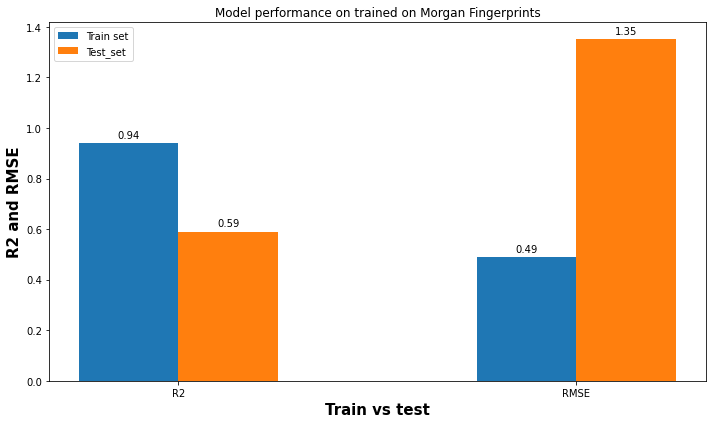

In [43]:
## save barplot
SVR = df["Train"]
RF = df['Test']
labels = df.labels

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width / 2, SVR, width, label='Train set')
rects2 = ax.bar(x + width / 2, RF, width, label='Test_set')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R2 and RMSE', fontweight='bold', fontsize=15)
ax.set_xlabel('Train vs test', fontweight='bold', fontsize=15)
ax.set_title('Model performance on trained on Morgan Fingerprints')
ax.set_xticks(x, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.savefig("results/scores.png")